In [1]:
import numpy as np
from simulation.generate_path import generate_path
import matplotlib.pyplot as plt
from matplotlib.animation import PillowWriter
# from matplotlib.animation import FFMpegWriter
from mpl_toolkits.mplot3d import Axes3D
from estimation.distance_sensor import distance_sensors
from estimation.iterative_estimator import iterative_estimator
from estimation.non_iterative_estimator import non_iterative_estimator
from estimation.kalman_filter_from_points import kalman_filter_from_points
from estimation.kalman_filter_from_points_with_acc import kalman_filter_from_points_acc
from estimation.improved_kalman_filter_from_points_with_acc import improved_kalman_filter_from_points_acc
from estimation.KF_with_mahalanobis_threshold import kalman_filter_with_mahalanobis

# For making the plots interactive, uncomment next line:
# %matplotlib widget

/home/user/miniconda3/envs/cuda_test/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


78554


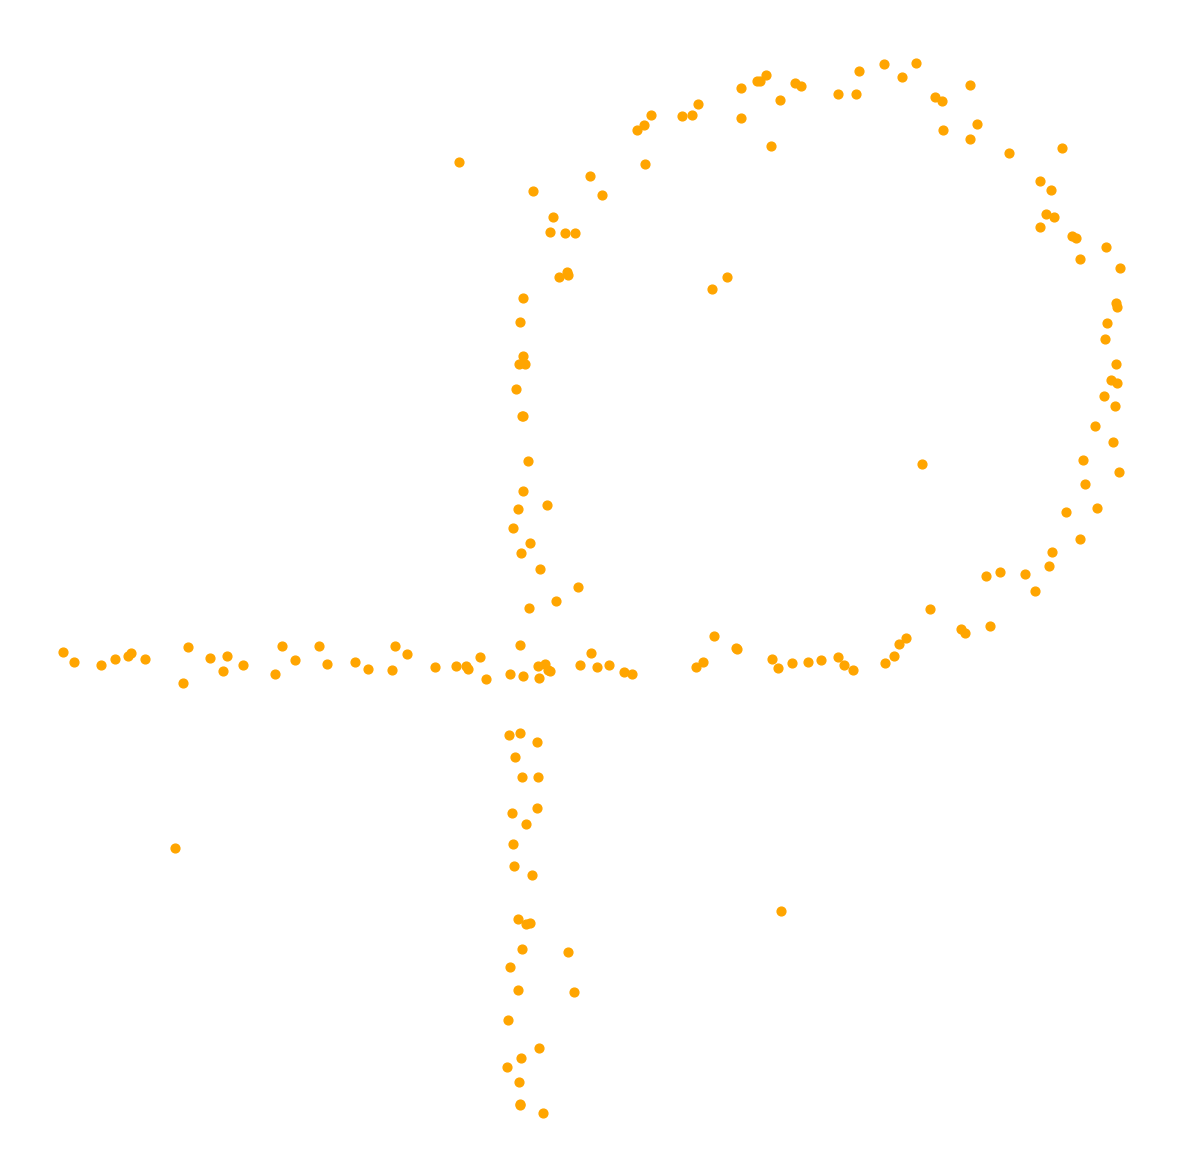

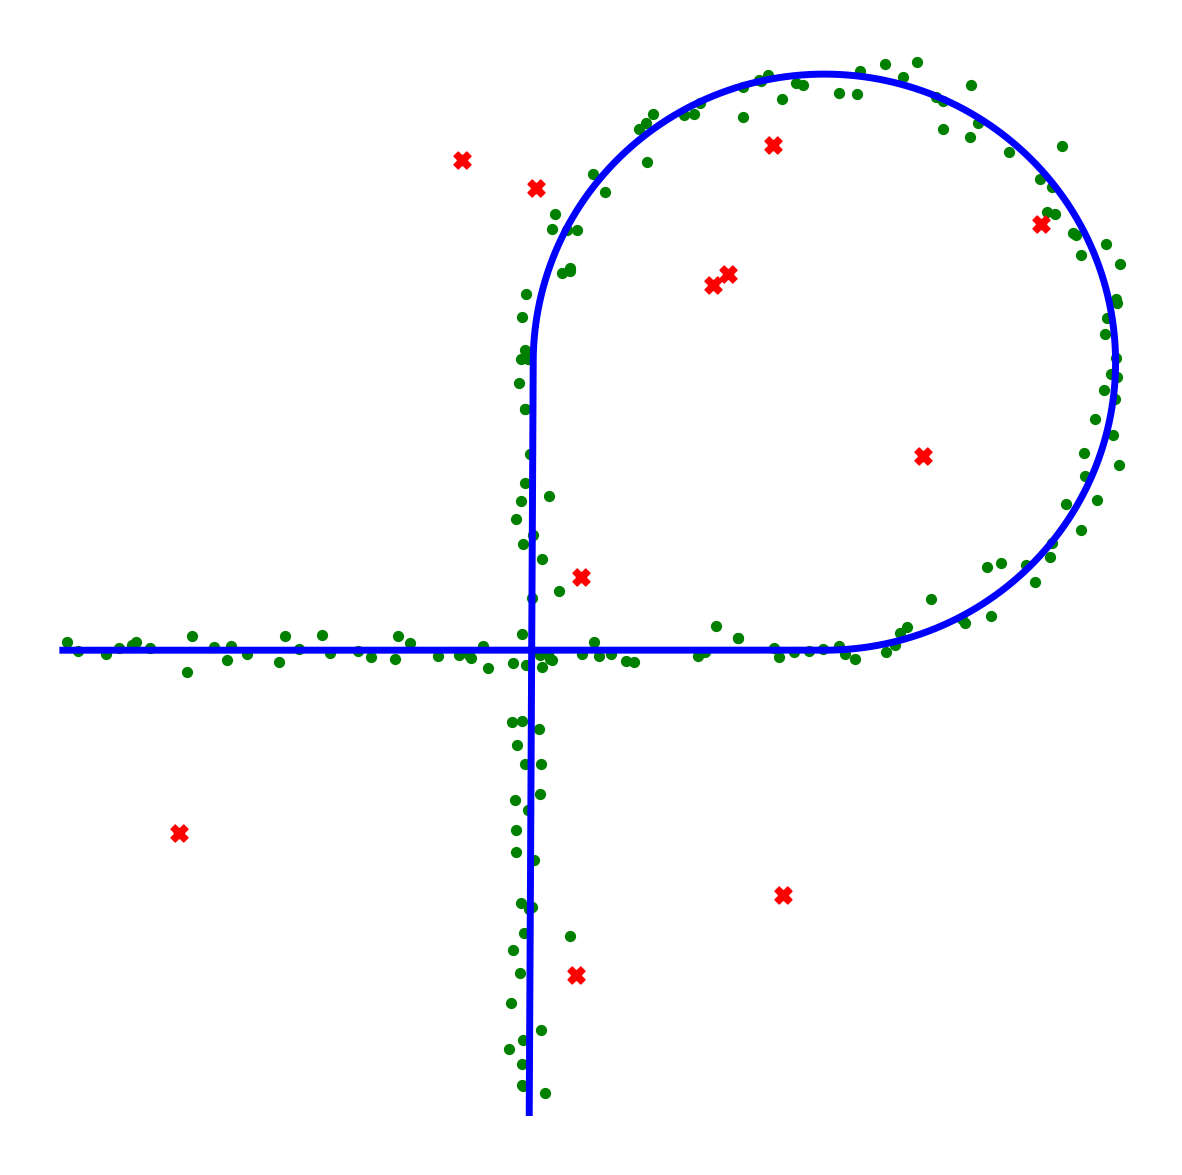

In [2]:
# animate iterative alone no outliers (with error for all 3 axis)

# print the seed used
# seed = np.random.randint(0, 100000)
seed = 78554
print(seed)
np.random.seed(seed)


target_initial_pos = np.array([0, 0, 5000])
target_speed_xy = 50
target_speed_z = 10
target_rot_speed = 3
time_res = 0.1
sensor_sigma = 25
outlier_percentage = 4
outlier_sigma=500

path1 = generate_path(0, target_speed_xy, target_speed_z, target_initial_pos, time_res)
path1.add_straight_interval(50)
path1.add_xy_turn_interval(90, -np.deg2rad(target_rot_speed))
path1.add_straight_interval(50)


# create sensors
sensors = distance_sensors([[-5000,0,0], [400, -7400, 0], [800, 800, 0]], sensor_sigma, outlier_percentage=outlier_percentage, outlier_sigma=outlier_sigma)
sensors.calculate_measurements(path1.path)

# create it estimation
it_est = iterative_estimator(sensors, path1.path[0,:])
estimated_path = it_est.estimate_path()
cov_mat_it = it_est.get_cov_err_with_sigma(estimated_path, sigma=15)

MSE_it_est = np.sqrt(np.sum(np.square(estimated_path-path1.path), 1))
MSE_it_est_less_points = MSE_it_est[::10]

estimated_less_points = estimated_path[::10,:]
outliers_less_point = np.any(sensors.outliers[::10], axis=1)
# estimated_outliers = estimated_less_points[outliers_less_point]
estimated_outliers = estimated_less_points[np.all([MSE_it_est_less_points > 200, outliers_less_point], axis=0)]


# Plot the estimated path
fig = plt.figure(figsize = (15, 15))

# plt.plot(path1.path[:, 0], path1.path[:, 1], color='blue',  label=f'true path', linewidth=5)
plt.scatter(estimated_less_points[:, 0], estimated_less_points[:, 1], color='orange', s=40, label=f'estimated path',)

plt.grid()
plt.axis('off')
plt.show()



# Plot the estimated path
fig = plt.figure(figsize = (15, 15))

plt.plot(path1.path[:, 0], path1.path[:, 1], color='blue',  label=f'true path', linewidth=5)
plt.scatter(estimated_less_points[:, 0], estimated_less_points[:, 1], color='green', s=50, label=f'estimated path',)
plt.scatter(estimated_outliers[:, 0], estimated_outliers[:, 1], color='red', s=50, label=f'estimated path',)
plt.scatter(estimated_outliers[:, 0], estimated_outliers[:, 1], color='red', marker='X', s=150, label=f'estimated path',)

plt.grid()
plt.axis('off')
plt.show()


78554
outlier ratio is 0.027605244996549344


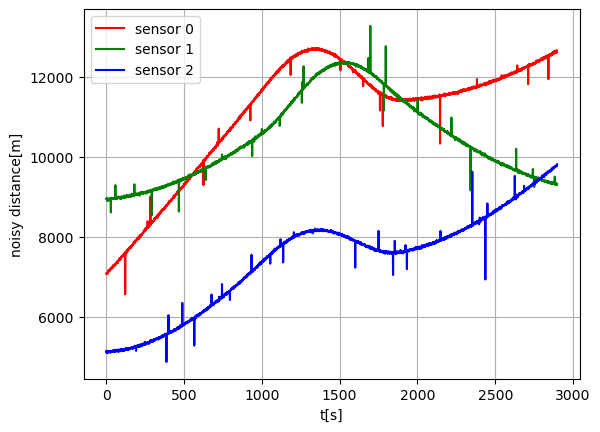

In [14]:

# print the seed used
# seed = np.random.randint(0, 100000)
seed = 78554
print(seed)
np.random.seed(seed)


target_initial_pos = np.array([0, 0, 5000])
target_speed_xy = 50
target_speed_z = 10
target_rot_speed = 3
time_res = 0.1
sensor_sigma = 15
outlier_percentage = 2
outlier_sigma=500

path1 = generate_path(0, target_speed_xy, target_speed_z, target_initial_pos, time_res)
path1.add_straight_interval(100)
path1.add_xy_turn_interval(90, -np.deg2rad(target_rot_speed))
path1.add_straight_interval(100)


# create sensors
sensors = distance_sensors([[-5000,0,0], [400, -7400, 0], [800, 800, 0]], sensor_sigma, outlier_percentage=outlier_percentage, outlier_sigma=outlier_sigma)
sensors.calculate_measurements(path1.path)


outliers = np.any(sensors.outliers, axis=1)
print(f"outlier ratio is {np.sum(outliers) / outliers.size}")


plt.figure()
plt.plot(sensors.noisy_distances[:,0], label='sensor 0', color='r')
plt.plot(sensors.noisy_distances[:,1], label='sensor 1', color='g')
plt.plot(sensors.noisy_distances[:,2], label='sensor 2', color='b')

plt.xlabel('t[s]')
plt.ylabel('noisy distance[m]')
plt.grid()
plt.legend(loc='upper left')
plt.show()